In [ ]:
%pip install openai

# GPT-4o-mini

In [34]:
import os 

#open_api_api_key = os.getenv("OPENAI_API_KEY")
open_api_api_key= os.environ.get('AZURE_OPENAI_API_KEY')

print(open_api_api_key)


None


### Prompt

Dado el siguiente diagrama BPMN en formato XML, genera una descripción detallada y precisa del proceso de negocio que representa. La descripción debe ser clara y estructurada, de manera que cualquier persona sin conocimiento previo del diagrama pueda modelar el mismo proceso en BPMN. Intenta ser lo más breve posible, no dbee ser demasiado extensa.

Instrucciones:
Identifica el contexto del proceso a partir del nombre del participante y las tareas.
Describe el flujo de actividades en orden cronológico, mencionando cada paso de manera comprensible.
Explica las decisiones que se toman en el proceso y sus condiciones (ej., si hay gateways exclusivos o inclusivos).
Menciona los actores involucrados en cada paso, destacando sus roles y responsabilidades.
Incluye información sobre paralelismo o sincronización si existen gateways paralelos.
Finaliza la descripción con un contexto del negocio, indicando en qué entorno se desarrolla este proceso y cuál es su propósito.
Ejemplo de Entrada (BPMN en XML):

```xml
<bpmn:definitions xmlns:bpmn="http://www.omg.org/spec/BPMN/20100524/MODEL" ...>
  <bpmn:process id="Process_1" isExecutable="false">
    <bpmn:laneSet>
      <bpmn:lane id="Lane_1" name="Logistics">
        <bpmn:flowNodeRef>Task_12j0pib</bpmn:flowNodeRef>
      </bpmn:lane>
      <bpmn:lane id="Lane_2" name="Secretary">
        <bpmn:flowNodeRef>Task_0jsoxba</bpmn:flowNodeRef>
        <bpmn:flowNodeRef>ExclusiveGateway_1mpgzhg</bpmn:flowNodeRef>
        ...
      </bpmn:lane>
    </bpmn:laneSet>
    <bpmn:startEvent id="StartEvent_1" name="Ship goods">
      <bpmn:outgoing>SequenceFlow_14a0oky</bpmn:outgoing>
    </bpmn:startEvent>
    <bpmn:task id="Task_0vaxgaa" name="Clarify shipment method">
      <bpmn:incoming>SequenceFlow_023hzxi</bpmn:incoming>
      <bpmn:outgoing>SequenceFlow_1rss71o</bpmn:outgoing>
    </bpmn:task>
    <bpmn:exclusiveGateway id="ExclusiveGateway_1mpgzhg" name="Special handling?">
      <bpmn:incoming>SequenceFlow_1rss71o</bpmn:incoming>
      <bpmn:outgoing>SequenceFlow_0iu9po7</bpmn:outgoing>
      <bpmn:outgoing>SequenceFlow_1xv6wk4</bpmn:outgoing>
    </bpmn:exclusiveGateway>
    ...
  </bpmn:process>
</bpmn:definitions>
```

Formato de Respuesta Esperado:
Genera una descripción siguiendo este estilo:

If goods shall be shipped, the secretary clarifies who will do the shipping. If you have large amounts, special shipping will be necessary. In these cases, the secretary invites three logistic companies to make offers and selects one of them. In case of small amounts, normal post shipment is used. Therefore, a package label is written by the secretary, and a parcel insurance is taken by the logistics department head if necessary.
Meanwhile, the goods can already be packaged by the warehouse staff.
If everything is ready, the packaged goods are prepared for being picked up by the logistic company.

Background
This process happens at a small hardware company that ships small amounts of goods to end customers but also large amounts to other shops.


In [29]:
promptv2=f"""
 Dado el siguiente diagrama BPMN en formato XML, genera una descripción detallada y precisa del proceso de negocio que representa.
    La descripción debe ser clara y estructurada, de manera que cualquier persona sin conocimiento previo del diagrama pueda modelar el mismo proceso en BPMN. Intenta ser lo más breve posible, no debe ser extensa.

    ### **Instrucciones:**
    1. Identifica el contexto del proceso a partir del nombre del participante y las tareas.
    2. Describe el flujo de actividades en orden cronológico, mencionando cada paso de manera comprensible.
    3. Explica las decisiones que se toman en el proceso y sus condiciones (ej., si hay gateways exclusivos o inclusivos).
    4. Menciona los actores involucrados en cada paso, destacando sus roles y responsabilidades.
    5. Incluye información sobre paralelismo o sincronización si existen gateways paralelos.
    6. Finaliza la descripción con un contexto del negocio, indicando en qué entorno se desarrolla este proceso y cuál es su propósito.

### **Ejemplo :**
  <bpmn:process id="Process_1" isExecutable="false">
    <bpmn:startEvent id="StartEvent_1" name="Ship goods"/>
    <bpmn:task id="Task_0vaxgaa" name="Clarify shipment method"/>
    <bpmn:exclusiveGateway id="ExclusiveGateway_1mpgzhg" name="Special handling?"/>
    <bpmn:task id="Task_0e6hvnj" name="Get 3 offers from logistic companies"/>
    <bpmn:endEvent id="EndEvent_1" name="Shipment prepared"/>
  </bpmn:process>
</bpmn:definitions>

### **Salida esperada: **
Please model the following process:
If goods shall be shipped, the secretary clarifies who will do the shipping. If you have large amounts, special shipping will be necessary. In these cases, the secretary invites three logistic companies to make offers and selects one of them.
If everything is ready, the packaged goods are prepared for being picked up by the logistic company.

Background:
This process happens at a small hardware company that ships small amounts of goods to end customers but also large amounts to other shops.


### **BPMN XML:**
    ```xml
    {xml_content}
    ```
"""

In [11]:
prompt = f"""
    Dado el siguiente diagrama BPMN en formato XML, genera una descripción detallada y precisa del proceso de negocio que representa.
    La descripción debe ser clara y estructurada, de manera que cualquier persona sin conocimiento previo del diagrama pueda modelar el mismo proceso en BPMN. Intenta ser lo más breve posible, no debe ser extensa.

    ### **Instrucciones:**
    1. Identifica el contexto del proceso a partir del nombre del participante y las tareas.
    2. Describe el flujo de actividades en orden cronológico, mencionando cada paso de manera comprensible.
    3. Explica las decisiones que se toman en el proceso y sus condiciones (ej., si hay gateways exclusivos o inclusivos).
    4. Menciona los actores involucrados en cada paso, destacando sus roles y responsabilidades.
    5. Incluye información sobre paralelismo o sincronización si existen gateways paralelos.
    6. Finaliza la descripción con un contexto del negocio, indicando en qué entorno se desarrolla este proceso y cuál es su propósito.

    ### **BPMN XML:**
    ```xml
    {xml_content}
    ```
"""

In [30]:
from openai import OpenAI

# Asegúrate de definir la clave API

def obtener_descripciion_bpmn(open_api_api_key,xml_file, outpt_path):
       with open(xml_file, "r", encoding="utf-8") as file:
        xml_content = file.read()

        client = OpenAI(api_key=open_api_api_key)

        completion = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "Eres un experto en modelado de procesos BPMN2. Describe el proceso en el siguiente XML de BPMN."},
                {"role": "user", "content": promptv2}
            ]
        )

        descripcion_proceso = completion.choices[0].message.content

        with open(output_path, "w", encoding="utf-8") as output_file:
            output_file.write(descripcion_proceso)

        print(f"Descripción guardada en: {output_path}")

        return descripcion_proceso



In [27]:
# Ruta del archivo XML
proceso = r"C:\Users\AliciaSanJuliánFerna\Documents\proyectos\process-modeling\camunda\ex1\Dispatch-of-goods.bpmn"

with open(proceso, "r", encoding="utf-8") as file:
    xml_content = file.read()

output_path = r"C:\Users\AliciaSanJuliánFerna\Documents\proyectos\process-modeling\camunda\ex1\description-gpt4-o-mini.txt"

In [31]:
obtener_descripciion_bpmn(open_api_api_key,proceso, output_path)

Descripción guardada en: C:\Users\AliciaSanJuliánFerna\Documents\proyectos\process-modeling\camunda\ex1\description-gpt4-o-mini.txt


'### Descripción del Proceso: Envío de mercancías en una tienda de hardware de computadoras\n\n#### 1. Contexto del Proceso\nEl proceso descrito en el XML representa la logística de envío de mercancías desde una tienda de hardware de computadoras. La tienda se encarga de enviar productos a clientes finales y, ocasionalmente, a otras tiendas. Los participantes del proceso son el "Secretario", el "Logística" y el "Almacén".\n\n#### 2. Flujo de Actividades en Orden Cronológico\n- **Inicio del Proceso (StartEvent_1)**: El proceso se inicia con el evento de "Enviar mercancías".\n- **Clarificación del Método de Envío (Task_0vaxgaa)**: El Secretario debe aclarar cuál será el método de envío.\n- **Decisión sobre Manejo Especial (ExclusiveGateway_1mpgzhg)**: El Secretario decide si el envío requiere manejo especial.\n  - **Si No (SequenceFlow_0iu9po7)**: Si el envío no requiere manejo especial, el flujo progresa a la siguiente actividad, donde se escribe la etiqueta del paquete.\n  - **Si Sí (S

# Original

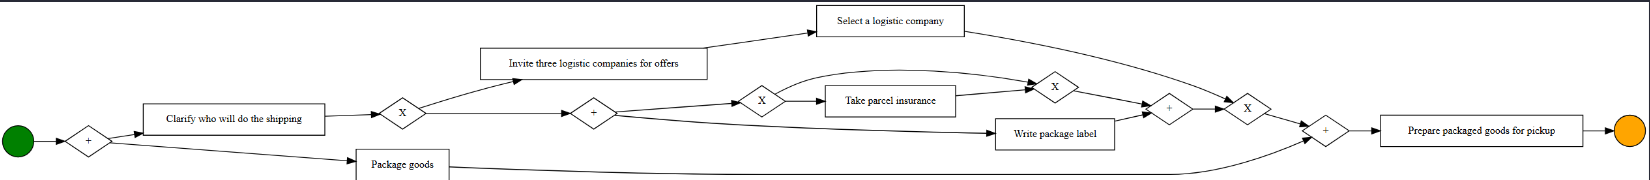

![Captura de pantalla 2025-02-03 104253.png](<attachment:Captura de pantalla 2025-02-03 104253.png>)

### DeepSeek Prompt extenso

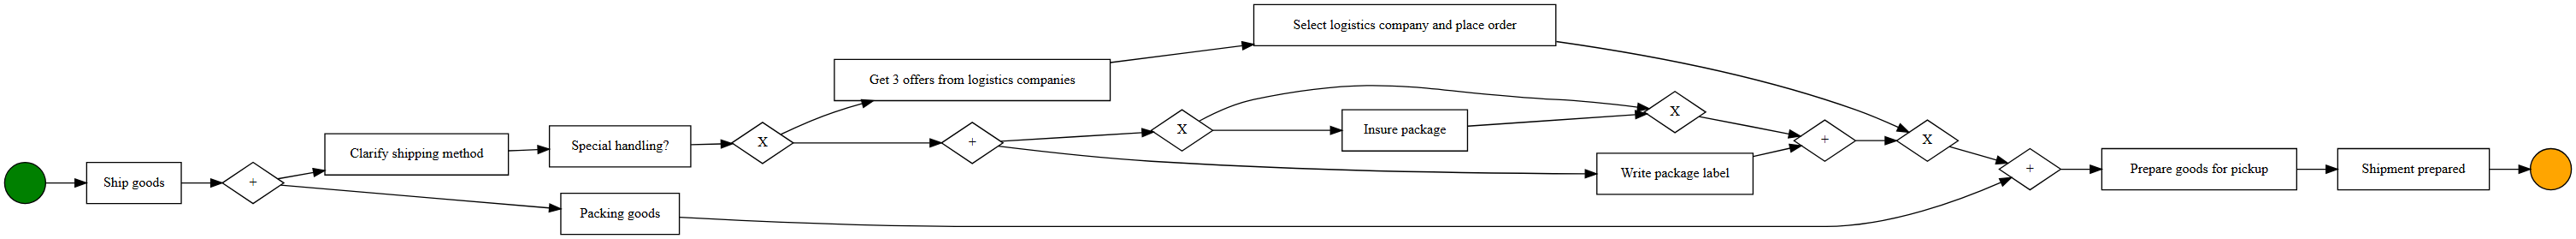

### GPT 4 Prompt extenso

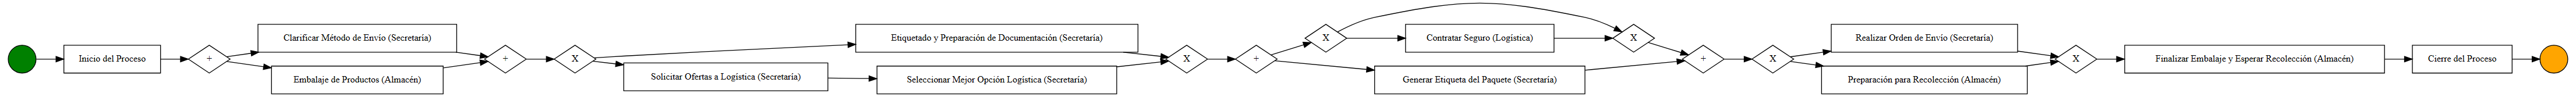

### GPT 3-o-mini Prompt extenso

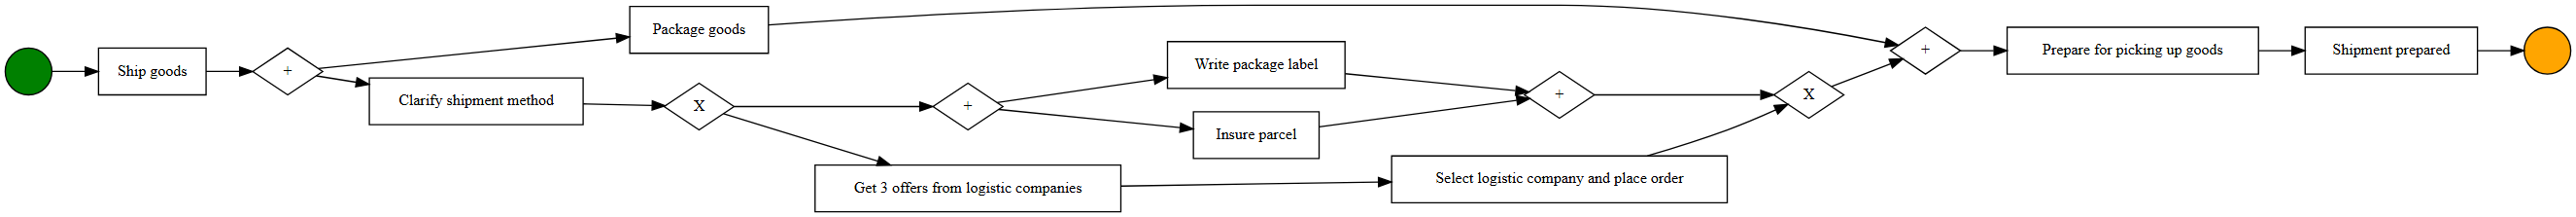

### GPT 3-o-mini-high Prompt extenso

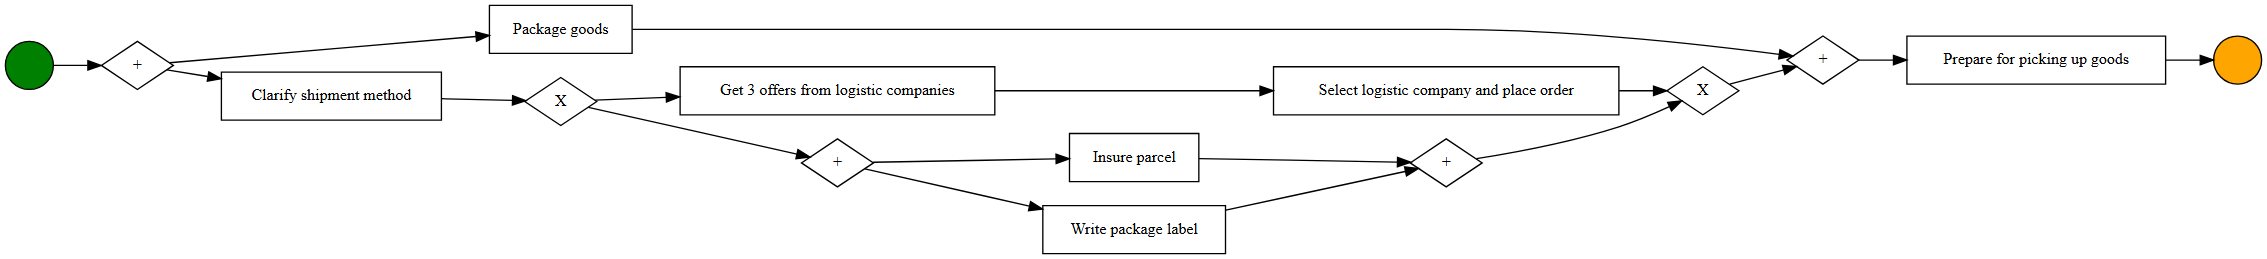
---


### DeepSeek Prompt corto

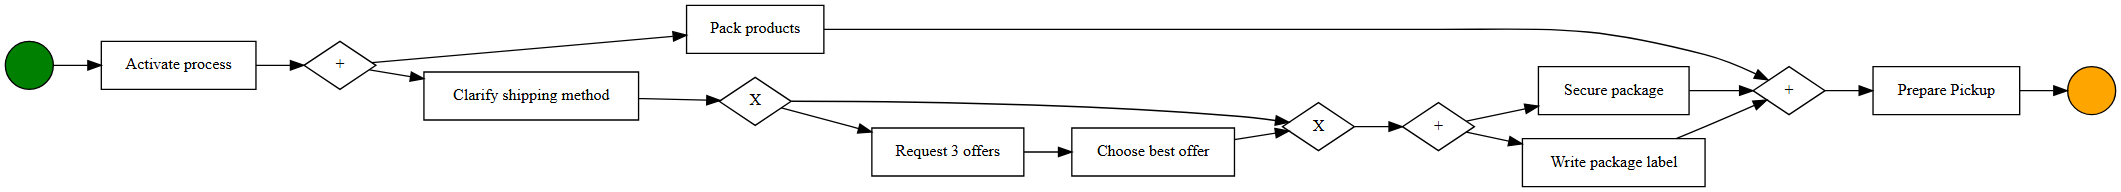

### GPT 4 Prompt corto

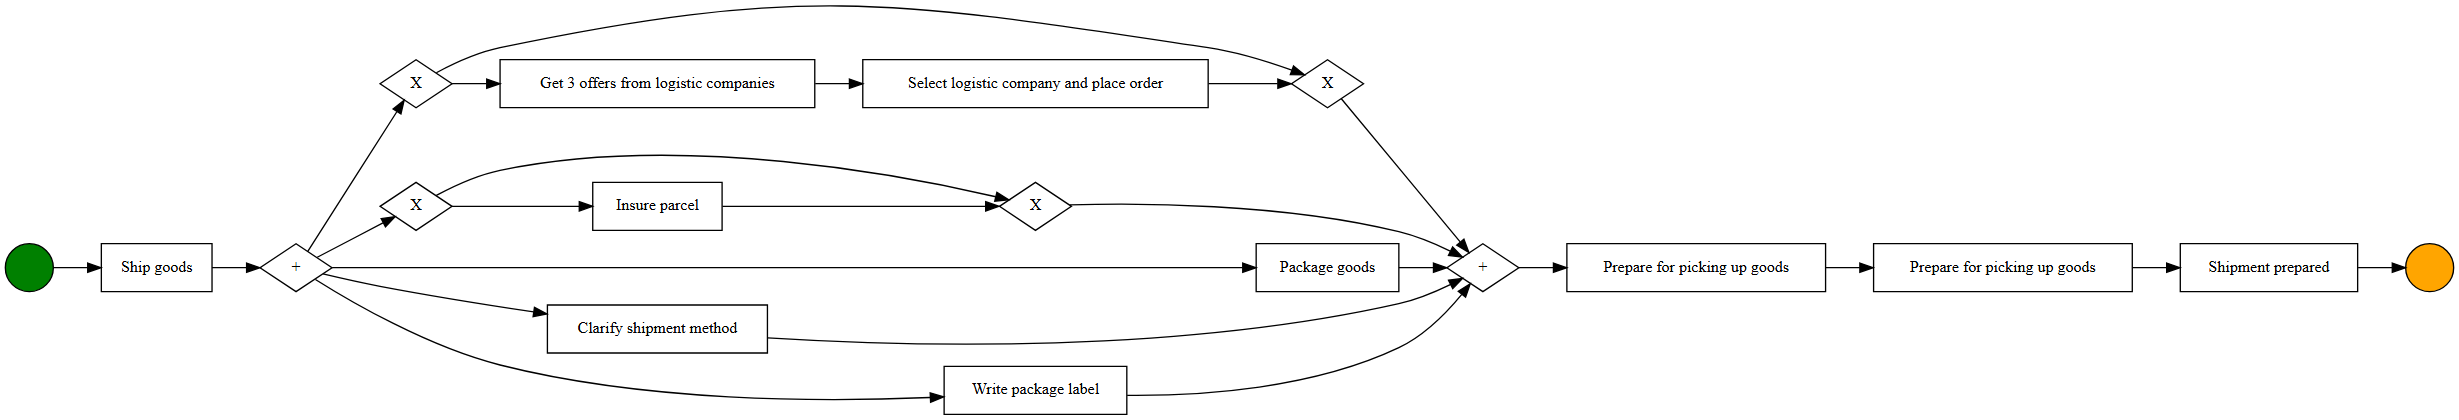

### GPT 3-o-mini Prompt corto

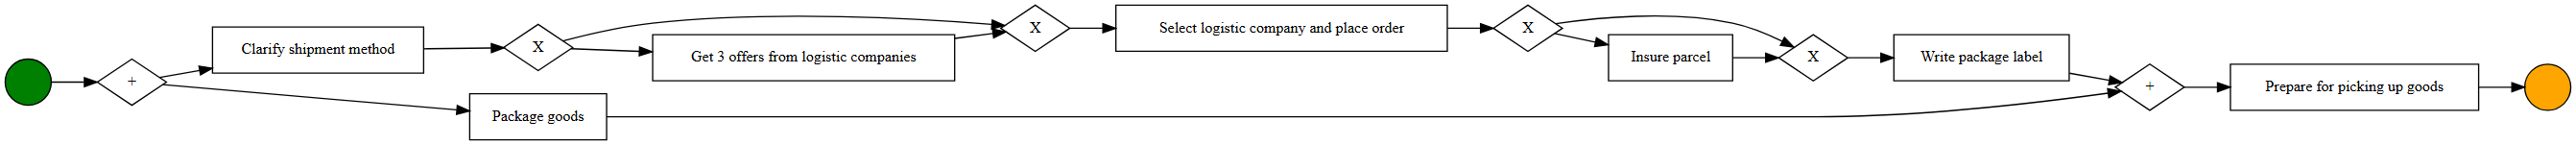

### GPT 3-o-mini-high Prompt corto

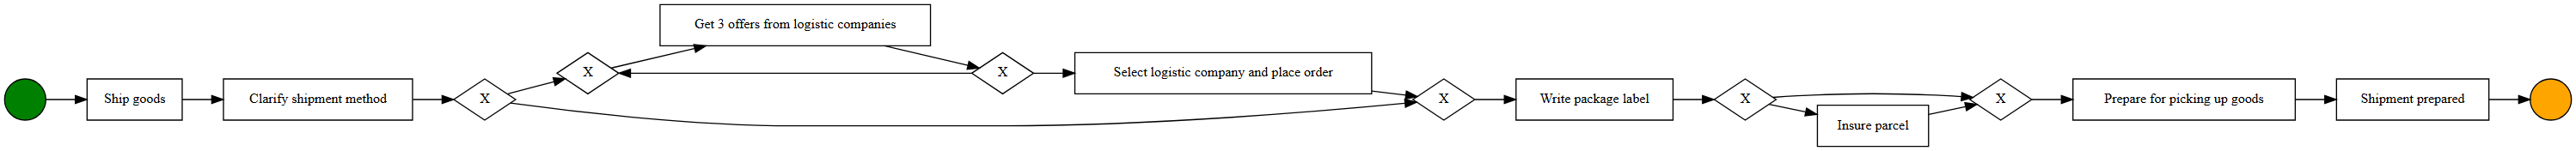

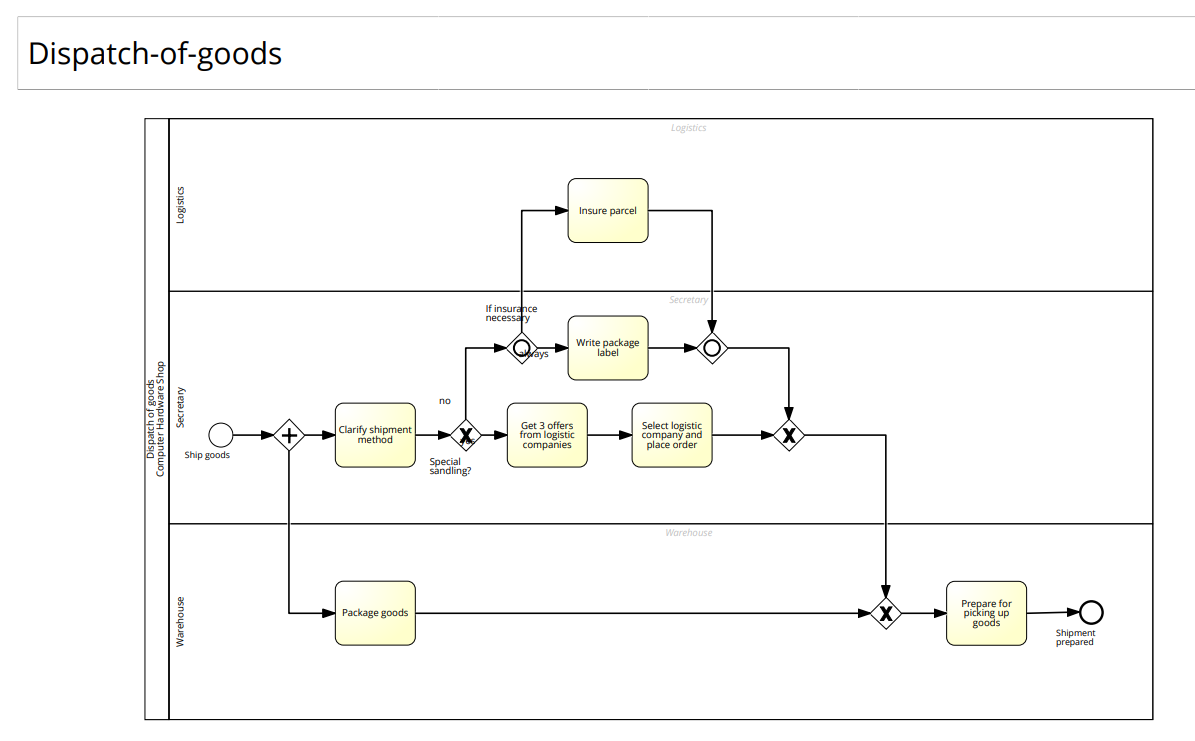